<a href="https://colab.research.google.com/github/vinigm/Estudos/blob/main/5_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning**
---

**Tópicos**
1. Teoria;
2. Atributos categóricos;
3. Atributos numéricos;
4. Dados faltantes.

Estudaremos uma estatística *preditiva*: focando no passado para prever o futuro

**Motivação:**
Você trabalha em um time da NBA e precisa entender a relação entre o peso e altura dos jogadores da liga para ajudar o seu time a otimizar a condição física dos seus jogadores. O objetivo é responder a seguinte pergunta: Dado a **altura** de um jogador, qual deve ser o seu **peso**?

**Dados**

In [ ]:
%%writefile nba.csv
height;weight;wage
2.01;86.2;17150000
1.93;106.1;898310
2.11;120.2;9881598
1.88;85.7;15643750
1.88;84.8;2875000
2.11;106.1;2376840
1.98;86.6;2625717
2.08;104.3;37199000
2.03;117.9;28942830
1.83;81.6;522738

Overwriting nba.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
nba_df = pd.read_csv('nba.csv', sep=';')
nba_df.head()

,height,weight,wage
0,2.01,86.2,17150000
1,1.93,106.1,898310
2,2.11,120.2,9881598
3,1.88,85.7,15643750
4,1.88,84.8,2875000


In [ ]:
np.corrcoef(nba_df['weight'], nba_df['height'])

array([[1.        , 0.73782414],
       [0.73782414, 1.        ]])

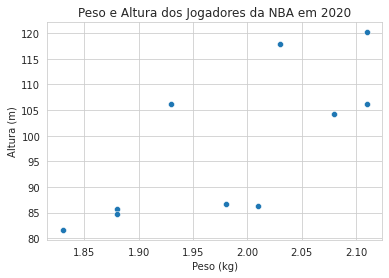

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(x=nba_df['height'], y=nba_df['weight'])
  grafico.set(title='Peso e Altura dos Jogadores da NBA em 2020', xlabel='Peso (kg)', ylabel='Altura (m)');

**Analise Preditiva**
- Dada a altura de um jogador, qual deve ser o seu peso?

Queremos uma equação matemática que represente essa relação. Uma possível equação seria a equação linear de primeiro grau:

y = f(x) = ax + b

f(altura) = a(altura) + b

**Aprendizado de Maquina**

O Aprendizado de máquina é uma area que busca modelos matemáticos preditivos utilizando dados e técnicas estatísticas computacionais.

**Preparação**
- Seleção da equação para o problema (modelo)
- Seleção dos dados disponiveis (atributos)
- Separação dos dados em treino e validação

**Treino**
- Treino do modelo com os dados de treino (algoritmo)
- Validação do modelo com os dados de validação (métricas)

**Para o exemplo da motivação:**
- **Preparação**
  - y = f(x) = ax+b
  - Peso e Altura
  - Separação dos dados em treino e validação
- **Treino**
  - Algoritmo
  - Métricas
- **Predição**

## **Atributos categóricos**
---



Apresentam valores discretos(int, float, etc), ou não (strings) para representar categorias

Vamos utilizar os dados sobre provas do vestibular, similar ao ENEM.


In [ ]:
%%writefile exam.csv
ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex
group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
group C,some college,standard,completed,0.69,0.9,0.88,F
group B,master's degree,standard,none,0.9,0.95,0.93,F
group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
group C,some college,standard,none,0.76,0.78,0.75,M
group B,associate's degree,standard,none,0.71,0.83,0.78,F
group B,some college,standard,completed,0.88,0.95,0.92,F
group B,some college,free/reduced,none,0.4,0.43,0.39,M
group D,high school,free/reduced,completed,0.64,0.64,0.67,M
group B,high school,free/reduced,none,0.38,0.6,0.5,F
group C,associate's degree,standard,none,0.58,0.54,0.52,M
group D,associate's degree,standard,none,0.4,0.52,0.43,M
group B,high school,standard,none,0.65,0.81,0.73,F
group A,some college,standard,completed,0.78,0.72,0.7,M
group A,master's degree,standard,none,0.5,0.53,0.58,F
group C,some high school,standard,none,0.69,0.75,0.78,F
group C,high school,standard,none,0.88,0.89,0.86,M
group B,some high school,free/reduced,none,0.18,0.32,0.28,F
group C,master's degree,free/reduced,completed,0.46,0.42,0.46,M
group C,associate's degree,free/reduced,none,0.54,0.58,0.61,F
group D,high school,standard,none,0.66,0.69,0.63,M

Overwriting exam.csv


In [ ]:
data = pd.read_csv('exam.csv')
data.head()

,ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M


**Atributos Categórico Nominal**
- NÃO apresentam relação de ordem

In [ ]:
data[['ethnicity', 'lunch', 'sex']].head()

,ethnicity,lunch,sex
0,group B,standard,F
1,group C,standard,F
2,group B,standard,F
3,group A,free/reduced,M
4,group C,standard,M


A técnica de codificação utilizada é a chamada **one hot encoding** em que as categorias de uma coluna são transformadas em colunas de zero e uns.

Por exemplo, com a categoria "sex":

In [ ]:
data['sex_m'] = data['sex'].apply(lambda sex: 1 if sex == 'M' else 0)
data['sex_f'] = data['sex'].apply(lambda sex: 1 if sex == 'F' else 0)

data.head()

,ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex,sex_m,sex_f
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1
1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,1
2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0
4,group C,some college,standard,none,0.76,0.78,0.75,M,1,0


**Atributos Categóricos Ordinais**

APRESENTAM valor de ordem.

In [ ]:
data[['parental_education', 'preparation_course']].head()

,parental_education,preparation_course
0,bachelor's degree,none
1,some college,completed
2,master's degree,none
3,associate's degree,none
4,some college,none


In [ ]:
data['parental_education'].drop_duplicates()

0      bachelor's degree
1           some college
2        master's degree
3     associate's degree
8            high school
15      some high school
Name: parental_education, dtype: object

In [ ]:
parental_education_mapper = {
    "master's degree": 6,
    "bachelor's degree": 5,
    "associate's degree": 4,
    "some college": 3,
    "high school": 2,
    "some high school" : 1,
}

In [ ]:
data['parental_education_encoded'] = data['parental_education'].apply(lambda level: parental_education_mapper[level])

In [ ]:
data.head()

,ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex,sex_m,sex_f,parental_education_encoded
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1,5
1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,1,3
2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1,6
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0,4
4,group C,some college,standard,none,0.76,0.78,0.75,M,1,0,3


# **Atributos Numéricos**
---



Apresentam valores discretos ou continuos (idade, salario, altura, peso, etc...)

In [ ]:
data.head()

,ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex,sex_m,sex_f,parental_education_encoded
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1,5
1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,1,3
2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1,6
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0,4
4,group C,some college,standard,none,0.76,0.78,0.75,M,1,0,3


In [ ]:
data[['math','reading', 'writing']].head()

,math,reading,writing
0,0.72,0.72,0.74
1,0.69,0.90,0.88
2,0.90,0.95,0.93
3,0.47,0.57,0.44
4,0.76,0.78,0.75


**ESCALA**

Normalização - reduz a escala para o intervalo de [0,1]. Útil quando diferentes atributos possuem escalas muito diferentes, como idade e salário. Contudo a presença de **outliers** pode afetar os resultados.

Exemplo para a coluna "math":

In [ ]:
min = data['math'].min()
print(min)

max = data['math'].max()
print(max)

0.18
0.9


In [ ]:
data['math_norm'] = data['math'].apply(lambda grade: (grade - min) / (max-min))

In [ ]:
data.head()

,ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex,sex_m,sex_f,parental_education_encoded,math_norm
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1,5,0.750000
1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,1,3,0.708333
2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1,6,1.000000
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0,4,0.402778
4,group C,some college,standard,none,0.76,0.78,0.75,M,1,0,3,0.805556


In [ ]:
min = data['math_norm'].min()
print(min)

max = data['math_norm'].max()
print(max)

0.0
1.0


**PADRONIZAÇÃO**

Ao invés de reduzir pra 0 e 1, reduzimos a MEDIA para 0 e o DESVIO PADRAO para 1.

Exemplo para "math":

In [ ]:
media = data['math'].mean()
print(media)

desvio_padrao = data['math'].std()
print(desvio_padrao)

0.6128571428571429
0.188019755800896


In [ ]:
data['math_padr'] = data['math'].apply(lambda nota: (nota - media) / desvio_padrao)
data.head()

,ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex,sex_m,sex_f,parental_education_encoded,math_norm,math_padr
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1,5,0.750000,0.569849
1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,1,3,0.708333,0.410291
2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1,6,1.000000,1.527195
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0,4,0.402778,-0.759799
4,group C,some college,standard,none,0.76,0.78,0.75,M,1,0,3,0.805556,0.782593


In [ ]:
media = data['math_padr'].mean()
print(media)

desvio_padrao = data['math_padr'].std()
print(desvio_padrao)

-8.458842092382145e-17
1.0


# **Dados Faltantes**
---



**Técnicas**
- Atributo como variavel resposta: descartar
- Atributo categórico: descartar
- Atributo numérico: descartar ou preencher com a média/mediana

**Outros Probelmas**
- Dados redundantes: descartar
- Dados desbalanceados: pesos
- Outliers: descartar (caso não seja relevante)

# **Modelo de Regressão Linear**
---



**Tópicos**
- Regressão
- Dados
- Treino
- Avaliação
- Predição

**Motivação**
- Dada a **altura** de um jogador, qual deve ser seu **peso**?

**Equação**
- Será utilizada uma equação de função de primeiro grau

**Pacote Scikit-Learn**

- Pacote para ciencia de dados e machine learning. Para regressão linear, temos:

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

# **Dados**
---



**Pré-processamento: 

In [ ]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/nba.csv" -O nba.csv 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
nba = pd.read_csv('nba.csv')
nba.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [ ]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.0+ KB


In [ ]:
nba.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,429.0,76.37296,5.657748,67.0,72.0,75.0,79.0,97.0
draft_year,429.0,2014.09324,3.937678,2001.0,2012.0,2015.0,2017.0,2019.0


In [ ]:
nba.drop(['rating', 'draft_year'], axis=1).describe()

,full_name,jersey,team,position,b_day,height,weight,salary,country,draft_round,draft_peak,college
count,429,429,406,429,429,429,429,429,429,429,429,363
unique,429,52,30,7,415,20,84,308,39,3,57,111
top,LeBron James,#0,Milwaukee Bucks,G,09/19/96,6-6 / 1.98,215 lbs. / 97.5 kg.,$1416852,USA,1,Undrafted,Kentucky
freq,1,79,17,169,2,50,23,20,323,257,67,26


In [ ]:
data = nba[['weight', 'height']]
data.head()

,weight,height
0,250 lbs. / 113.4 kg.,6-9 / 2.06
1,225 lbs. / 102.1 kg.,6-7 / 2.01
2,242 lbs. / 109.8 kg.,6-11 / 2.11
3,230 lbs. / 104.3 kg.,6-10 / 2.08
4,220 lbs. / 99.8 kg.,6-5 / 1.96


**HEIGHT**: Atributo numérico, formatar e padronizar

In [ ]:
data[['height']].head()

,height
0,6-9 / 2.06
1,6-7 / 2.01
2,6-11 / 2.11
3,6-10 / 2.08
4,6-5 / 1.96


In [ ]:
data['height'] = data['height'].apply(lambda height: float(height.split(sep='/')[-1].strip()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data[['height']].describe().T

,count,mean,std,min,25%,50%,75%,max
height,429.0,1.995641,0.083514,1.75,1.93,2.01,2.06,2.24


**WEIGHT**: Variavel resposta numérica, formatar.

In [ ]:
data['weight'] = data['weight'].apply(lambda weight: float(weight.split(sep='/')[-1].split(sep='kg')[0].strip()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data[['weight']].describe().T

,count,mean,std,min,25%,50%,75%,max
weight,429.0,97.219814,10.536428,77.1,89.4,96.6,104.3,131.5


In [ ]:
data.head()

,weight,height
0,113.4,2.06
1,102.1,2.01
2,109.8,2.11
3,104.3,2.08
4,99.8,1.96


**Treino / Teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['weight'], axis=1), 
    data['weight'], 
    test_size=0.25, 
    random_state=123
)

**Variaveis preditoras (predictors)**

In [ ]:
predictors_train.head()

,height
200,2.03
0,2.06
337,1.91
148,1.98
349,2.11


In [ ]:
predictors_train.shape

(321, 1)

In [ ]:
predictors_test.head()

,height
13,1.98
266,2.08
330,2.13
220,2.01
240,2.03


In [ ]:
predictors_test.shape

(108, 1)

**VARIAVEL RESPOSTA**

In [ ]:
target_train.head()

200    108.9
0      113.4
337     82.1
148     94.8
349    113.4
Name: weight, dtype: float64

In [ ]:
target_train.shape

(321,)

In [ ]:
target_test.head()

13      93.0
266     99.8
330     98.0
220    111.1
240    101.6
Name: weight, dtype: float64

In [ ]:
target_test.shape

(108,)

**Treino do Modelo**

O treino consiste na etapa de calculo dos coeficientes baseado na associação da variavel resposta com as variaveis preditoras.

**Algoritmo**
- Regressão linear através do método gradiente.

In [ ]:
model = model.fit(predictors_train, target_train)

In [ ]:
model.__dict__

{'_residues': 15615.686282736986,
 'coef_': array([88.97464703]),
 'copy_X': True,
 'feature_names_in_': array(['height'], dtype=object),
 'fit_intercept': True,
 'intercept_': -80.263088457123,
 'n_features_in_': 1,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'rank_': 1,
 'singular_': array([1.49222304])}

In [ ]:
a = model.coef_
print(a)

[88.97464703]


In [ ]:
b = model.intercept_
print(b)

-80.263088457123


Logo temos:

y = ax+b

f(altura) = a(altura) + b

peso = f(altura) = 88.9746 * (altura) - 80.2631

In [ ]:
data.head(1)

,weight,height
0,113.4,2.06


In [ ]:
altura = 2.06
peso = (a * altura) + b

print(peso)

[103.02468443]


In [ ]:
altura = np.array([2.06])
peso = model.predict(altura.reshape(-1,1))

print(peso)

[103.02468443]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# **Avaliação do Modelo**
---

Para enter o poder preditivo do modelo de aprendizagem supervisionada, precisamos avaliar sua capacidade de generalização, ou seja, avalivar as predições em dados "não vistos" na etapa de treino. Comparamos então as predições com os dados reais através de uma métrica.


 - **Salário predito**

In [ ]:
target_predicted = model.predict(predictors_test)

In [ ]:
target_predicted[0:5]

array([ 95.90671266, 104.80417737, 109.25290972,  98.57595208,
       100.35544502])

In [ ]:
target_predicted.shape

(108,)

In [ ]:
target_test[0:5]

13      93.0
266     99.8
330     98.0
220    111.1
240    101.6
Name: weight, dtype: float64

In [ ]:
target_test.shape

(108,)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

7.680474067138796


In [ ]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=['weight'])], axis=1).reset_index(drop=True)
test_data['predicted'] = False

In [ ]:
test_data.head()

,height,weight,predicted
0,1.98,93.0,False
1,2.08,99.8,False
2,2.13,98.0,False
3,2.01,111.1,False
4,2.03,101.6,False


In [ ]:
prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['weight'])], axis=1).reset_index(drop=True)
prediction_data['predicted'] = True

In [ ]:
prediction_data.tail()

,height,weight,predicted
103,1.88,87.009248,True
104,1.93,91.457980,True
105,2.03,100.355445,True
106,1.91,89.678487,True
107,2.03,100.355445,True


In [ ]:
prediction = pd.concat([test_data, prediction_data]).reset_index(drop=True)

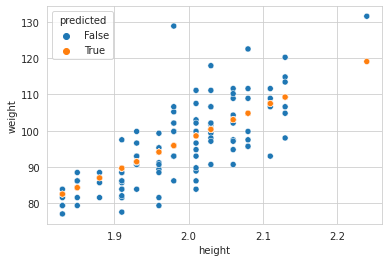

In [ ]:
with sns.axes_style('whitegrid'):

  # peso = 88.9746 * altura - 80.2631
  sns.scatterplot(data=prediction, x='height', y='weight', hue='predicted')

In [ ]:
data = nba[['weight', 'height', 'position']]
data.head()

,weight,height,position
0,250 lbs. / 113.4 kg.,6-9 / 2.06,F
1,225 lbs. / 102.1 kg.,6-7 / 2.01,F
2,242 lbs. / 109.8 kg.,6-11 / 2.11,F-G
3,230 lbs. / 104.3 kg.,6-10 / 2.08,F
4,220 lbs. / 99.8 kg.,6-5 / 1.96,G


In [ ]:
data["position"].drop_duplicates()

0       F
2     F-G
4       G
6     F-C
9       C
20    G-F
44    C-F
Name: position, dtype: object

In [ ]:
data['position_f'] = data['position'].apply(lambda position: 1 if position == 'F' else 0)
data['position_g'] = data['position'].apply(lambda position: 1 if position == 'G' else 0)
data['position_c'] = data['position'].apply(lambda position: 1 if position == 'C' else 0)
data['position_fg'] = data['position'].apply(lambda position: 1 if position == 'F-G' else 0)
data['position_fc'] = data['position'].apply(lambda position: 1 if position == 'F-C' else 0)
data['position_gf'] = data['position'].apply(lambda position: 1 if position == 'G-F' else 0)
data['position_cf'] = data['position'].apply(lambda position: 1 if position == 'C-F' else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data[['position', 'position_f', 'position_g', 'position_c', 'position_fg', 'position_fc', 'position_gf', 'position_cf']].head()

,position,position_f,position_g,position_c,position_fg,position_fc,position_gf,position_cf
0,F,1,0,0,0,0,0,0
1,F,1,0,0,0,0,0,0
2,F-G,0,0,0,1,0,0,0
3,F,1,0,0,0,0,0,0
4,G,0,1,0,0,0,0,0


In [ ]:
data = data.drop(['position'], axis=1)

In [ ]:
data['height'] = data['height'].apply(lambda height: float(height.split(sep="/")[-1].strip()))

altura_media = data['height'].mean()
altura_desvio_padrao = data['height'].std()

data['height'] = data['height'].apply(lambda height: (height - altura_media) / altura_desvio_padrao)

In [ ]:
data["weight"] = data["weight"].apply(lambda weight: float(weight.split(sep="/")[-1].split(sep="kg")[0].strip()))

In [ ]:
data.head()

,weight,height,position_f,position_g,position_c,position_fg,position_fc,position_gf,position_cf
0,113.4,0.770634,1,0,0,0,0,0,0
1,102.1,0.171934,1,0,0,0,0,0,0
2,109.8,1.369333,0,0,0,1,0,0,0
3,104.3,1.010114,1,0,0,0,0,0,0
4,99.8,-0.426765,0,1,0,0,0,0,0


In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['weight'], axis=1), 
    data['weight'], 
    test_size=0.25, 
    random_state=123
)

In [ ]:
model_v2 = model.fit(predictors_train, target_train)
model_v2.__dict__

{'_residues': array([], dtype=float64),
 'coef_': array([ 3.51031289,  0.42821737, -6.91455581,  6.6325834 , -3.72005395,
         2.76212644, -3.04719877,  3.85888132]),
 'copy_X': True,
 'feature_names_in_': array(['height', 'position_f', 'position_g', 'position_c', 'position_fg',
        'position_fc', 'position_gf', 'position_cf'], dtype=object),
 'fit_intercept': True,
 'intercept_': 99.07105131057615,
 'n_features_in_': 8,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'rank_': 7,
 'singular_': array([1.95434384e+01, 9.26305551e+00, 5.49363996e+00, 4.70938191e+00,
        3.76700509e+00, 3.19445730e+00, 2.43995980e+00, 1.65111536e-15])}

In [ ]:
a = model_v2.coef_
print(a)

[ 3.51031289  0.42821737 -6.91455581  6.6325834  -3.72005395  2.76212644
 -3.04719877  3.85888132]


In [ ]:
b = model_v2.intercept_
print(b)

99.07105131057615


In [ ]:
target_predicted = model_v2.predict(predictors_test)

In [ ]:
rmse_v2 = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse_v2)

7.267852030433409


In [ ]:
print(f"Melhoria de {round(100 * (1 - (rmse_v2 / rmse)), 2)}%")

Melhoria de 5.37%


In [ ]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=['weight'])], axis=1).reset_index(drop=True)
test_data['predicted'] = False

prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['weight'])], axis=1).reset_index(drop=True)
prediction_data['predicted'] = True

prediction_v2 = pd.concat([test_data, prediction_data]).reset_index(drop=True)


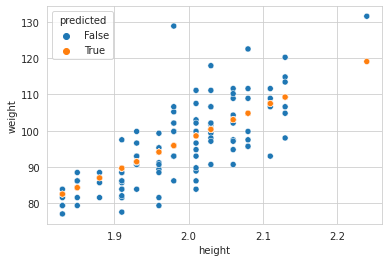

In [ ]:
with sns.axes_style('whitegrid'):

  # peso = 88.9746 * altura - 80.2631
  sns.scatterplot(data=prediction, x='height', y='weight', hue='predicted')

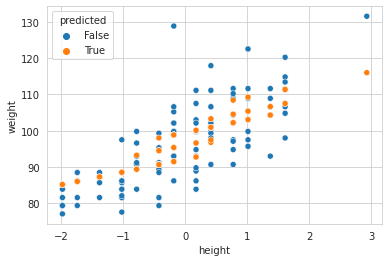

In [ ]:
with sns.axes_style('whitegrid'):

  # peso = 3.51031289 * altura + 0.42821737 * posicao_f + ... + 99.07105131057611
  sns.scatterplot(data=prediction_v2, x='height', y='weight', hue='predicted')

# **Predição**
---


Exemplo: Pivô com 2,05m e 99kg

In [ ]:
data.head(1)

,weight,height,position_f,position_g,position_c,position_fg,position_fc,position_gf,position_cf
0,113.4,0.770634,1,0,0,0,0,0,0


In [ ]:
altura_padronizada = (2.05 - altura_media) / altura_desvio_padrao
print(altura_padronizada)

0.6508938262870619


In [ ]:
jogador = np.array([altura_padronizada, 0, 0, 1, 0, 0, 0, 0])
print(jogador)

[0.65089383 0.         0.         1.         0.         0.
 0.         0.        ]


In [ ]:
peso = model_v2.predict(jogador.reshape(1, -1))
print(peso)

[107.9884757]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Logo, o peso ideal é 107,98 kg e o nosso jogador tem 99kg, assim, ele precisa **GANHAR** peso para atuar melhor como pivô, baseado no nosso modelo

Agora, vamos fazer o exemplo como ele sendo **atacante**

In [ ]:
data.head(1)

,weight,height,position_f,position_g,position_c,position_fg,position_fc,position_gf,position_cf
0,113.4,0.770634,1,0,0,0,0,0,0


In [ ]:
altura_padronizada = (2.05 - altura_media) / altura_desvio_padrao
print(altura_padronizada)

0.6508938262870619


In [ ]:
jogador = np.array([altura_padronizada, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
peso = model_v2.predict(jogador.reshape(1, -1))
print(peso)

[101.78410967]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Assim, o jogador para jogar como atacante precisa ter 101kg, logo não é necessário que o jogador ganhe peso para atuar como **atacante**

# **Modelos de Classificação**

## **1. Classificação**

### **Motivação**

Dado a largura e o comprimento das pedalas e sepalas de uma flor do genero *iris*, qual é a sua especie: *versicolor, setosa* ou *virginica*?

In [ ]:
def f(petal_lenght: float, pedal_width: float, sepal_lenght: float, sepal_width: float) -> str:
  if sepal_width > 5:
    if pedal_width > 2:
      return 'versicolor'
    else:
      return 'virginica'
  else:
    return 'setosa'

Esse conjunto de regras pode ser representado graficamente por uma **arvore de decisão** onde as folhas representam as classes do atributo categorico ou variavel respota a ser predito e os **nós** as regras de decisão

**OBJETIVO DA BRINCADEIRA**: brincar uma arvore de dados baseada no nosso conjunto de dados

Mas... qual o melhor conjunto de regras (atributos e valores de corte) pra esse conjunto de dados? Rááaááá aí que ta parada meu irmão

### **Arvore de decisão**

Abordagem estistica que busca encontrar a relação entre um atributo categorico alvo y e um conjunto de atributos preditores x

As métricas mais utilizadas são Gini e Entropia.

### **Pacote Scikit Learn**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier

## **2. Pré-processamento**

Nesse modulo vamos utilizar dados sobre as caracteristicas fisicas das plantas do genero **iris**

In [ ]:
import numpy as np
import pandas
import seaborn as sns
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Como o objetivo é classificar plantas nas suas especies, vamos explorar as caracteristicas de cada uma

In [ ]:
iris[['species']].drop_duplicates()

,species
0,setosa
50,versicolor
100,virginica


**VERSICOLOR**

In [ ]:
iris.query("species == 'versicolor'").describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.936,0.516171,4.9,5.600,5.90,6.3,7.0
sepal_width,50.0,2.770,0.313798,2.0,2.525,2.80,3.0,3.4
petal_length,50.0,4.260,0.469911,3.0,4.000,4.35,4.6,5.1
petal_width,50.0,1.326,0.197753,1.0,1.200,1.30,1.5,1.8


**SETOSA**

In [ ]:
iris.query("species == 'setosa'").describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.006,0.352490,4.3,4.8,5.0,5.200,5.8
sepal_width,50.0,3.428,0.379064,2.3,3.2,3.4,3.675,4.4
petal_length,50.0,1.462,0.173664,1.0,1.4,1.5,1.575,1.9
petal_width,50.0,0.246,0.105386,0.1,0.2,0.2,0.300,0.6


**VIRGINICA**

In [ ]:
iris.query("species == 'virginica'").describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,6.588,0.635880,4.9,6.225,6.50,6.900,7.9
sepal_width,50.0,2.974,0.322497,2.2,2.800,3.00,3.175,3.8
petal_length,50.0,5.552,0.551895,4.5,5.100,5.55,5.875,6.9
petal_width,50.0,2.026,0.274650,1.4,1.800,2.00,2.300,2.5


**Visualização desses dados através de graficos:**

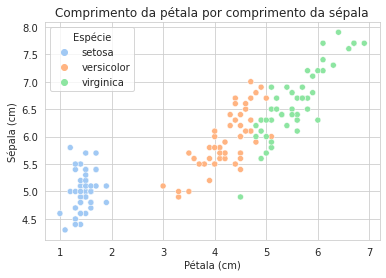

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=iris, x="petal_length", y="sepal_length", hue="species", palette="pastel")
  grafico.set(title='Comprimento da pétala por comprimento da sépala', xlabel='Pétala (cm)', ylabel='Sépala (cm)');
  grafico.get_legend().set_title("Espécie");

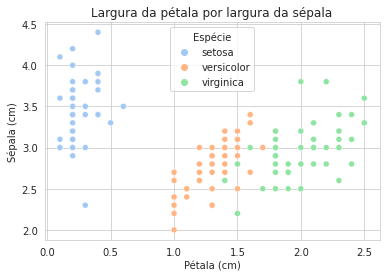

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=iris, x="petal_width", y="sepal_width", hue="species", palette="pastel")
  grafico.set(title='Largura da pétala por largura da sépala', xlabel='Pétala (cm)', ylabel='Sépala (cm)');
  grafico.get_legend().set_title("Espécie");

In [ ]:
data = iris[["species", "sepal_length",	"sepal_width",	"petal_length",	"petal_width"]]
data.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [ ]:
data.query("species == 'versicolor'").head()

,species,sepal_length,sepal_width,petal_length,petal_width
50,versicolor,7.0,3.2,4.7,1.4
51,versicolor,6.4,3.2,4.5,1.5
52,versicolor,6.9,3.1,4.9,1.5
53,versicolor,5.5,2.3,4.0,1.3
54,versicolor,6.5,2.8,4.6,1.5


In [ ]:
data.query("species == 'setosa'").head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [ ]:
data.query("species == 'virginica'").head()

,species,sepal_length,sepal_width,petal_length,petal_width
100,virginica,6.3,3.3,6.0,2.5
101,virginica,5.8,2.7,5.1,1.9
102,virginica,7.1,3.0,5.9,2.1
103,virginica,6.3,2.9,5.6,1.8
104,virginica,6.5,3.0,5.8,2.2


In [ ]:
len(data)

150

## **Treino / Teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['species'], axis=1), 
    data['species'], 
    test_size=0.25, 
    random_state=123
)

**VARIAVEIS PREDITORAS** (PREDICTORS)

In [ ]:
predictors_train.head()

,sepal_length,sepal_width,petal_length,petal_width
16,5.4,3.9,1.3,0.4
82,5.8,2.7,3.9,1.2
60,5.0,2.0,3.5,1.0
35,5.0,3.2,1.2,0.2
143,6.8,3.2,5.9,2.3


In [ ]:
predictors_train.shape

(112, 4)

In [ ]:
predictors_test.head()

,sepal_length,sepal_width,petal_length,petal_width
72,6.3,2.5,4.9,1.5
112,6.8,3.0,5.5,2.1
132,6.4,2.8,5.6,2.2
88,5.6,3.0,4.1,1.3
37,4.9,3.6,1.4,0.1


In [ ]:
predictors_test.shape

(38, 4)

**VARIAVEIS RESPOSTA** (TARGET)

In [ ]:
target_train.head()

16         setosa
82     versicolor
60     versicolor
35         setosa
143     virginica
Name: species, dtype: object

In [ ]:
target_train.shape

(112,)

In [ ]:
target_test.head()

72     versicolor
112     virginica
132     virginica
88     versicolor
37         setosa
Name: species, dtype: object

In [ ]:
target_test.shape

(38,)

## **3. Treino**

O algoritmo que utilizaremos é o **CART**

In [ ]:
model = model.fit(predictors_train, target_train)

TypeError: ignored

In [ ]:
model.__dict__

# **26.1 AGRUPAMENTO**

Motivação: Um shopping quer segmentar seus clientes para melhorar o direcionamento de ações de marketing. Qual é a melhor forma de agrupa-los?

Queremos encontrar um conjunto de perfis médios e alocar os clientes ao perfil mais próximo.

In [ ]:
import numpy as np

#metricas de distancia

def dist(a: np.array, b: np.array) -> float:
  return np.linalg.norm(a-b)

#perfis medios (idade, renda anual em milhares)

grupo_a = np.array([30,40]) #perfil de 30 anos em média em ganham 40k no ano em média
grupo_b = np.array([57,90]) #perfil de 57 anos em média e ganham 90k no ano em média

#cliente e sua distancia dos perfis

cliente = np.array([27,50])

dist_a = dist(cliente, grupo_a) #10.44
dist_b = dist(cliente, grupo_b) #50

Perguntas relevantes:
- Qual a quantidade de grupos?
- Quais são as caracteristicas de cada grupo?
- Como calcular a distancia entre o grupo e os clientes?

## **Pacote Scikit-Learn**

Utilizaremos esse pacote para fazer o agrupamento através do método **k-médias**

In [ ]:
from sklearn.cluster import KMeans
model = KMeans()

## **Pré Processamento**

Vamos utilizar dados sobre a idade, renda e potencial de compra de clientes.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importando a biblioteca

In [ ]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/mall_customers.csv" -O mall_customers.csv 

In [ ]:
mall = pd.read_csv('./mall_customers.csv', sep=',')

In [ ]:
mall.head()

,id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      200 non-null    int64 
 1   gender  200 non-null    object
 2   age     200 non-null    int64 
 3   income  200 non-null    int64 
 4   score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Através do **PAIRPLOT** do SEABORN, podemos gerar visualizações para cada par de colunas do conjunto de dados

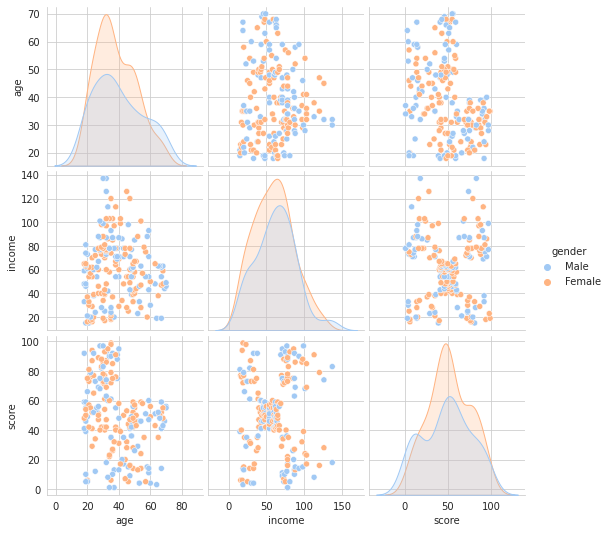

In [ ]:
with sns.axes_style('whitegrid'):
  grafico = sns.pairplot(data=mall.drop('id', axis=1), hue='gender', palette='pastel')

In [ ]:
data = mall[['age', 'income','score']]
data.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## **Treino**

Como o agrupamento por k-médias não é uma técnica supervisionada, não temos uma definição do certo ou real. Portanto, a ausência da etapa de validação da predição faz com que não exista a necessidade de dividir o conjunto de dados em treino e teste para treinar e validar o modelo

O treino de um modelo de k-médias é feito através do algoritmo de **Lloyd** por padrão. 

In [ ]:
model = KMeans(n_clusters=5)
model = model.fit(data)

In [ ]:
model.__dict__

{'_algorithm': 'elkan',
 '_n_init': 10,
 '_n_threads': 2,
 '_tol': 0.05146879666666668,
 'algorithm': 'auto',
 'cluster_centers_': array([[43.08860759, 55.29113924, 49.56962025],
        [32.69230769, 86.53846154, 82.12820513],
        [40.66666667, 87.75      , 17.58333333],
        [25.52173913, 26.30434783, 78.56521739],
        [45.2173913 , 26.30434783, 20.91304348]]),
 'copy_x': True,
 'feature_names_in_': array(['age', 'income', 'score'], dtype=object),
 'inertia_': 75350.77917248776,
 'init': 'k-means++',
 'labels_': array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
        4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
        4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
        2, 1, 2, 1, 2, 1, 

Com o modelo treinado, podemos visualizar os agrupamentos:

In [ ]:
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
clusters.head()

,cluster
0,4
1,3
2,4
3,3
4,4


In [ ]:
clustered_data = pd.concat([data, clusters], axis=1)
clustered_data.head()

,age,income,score,cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


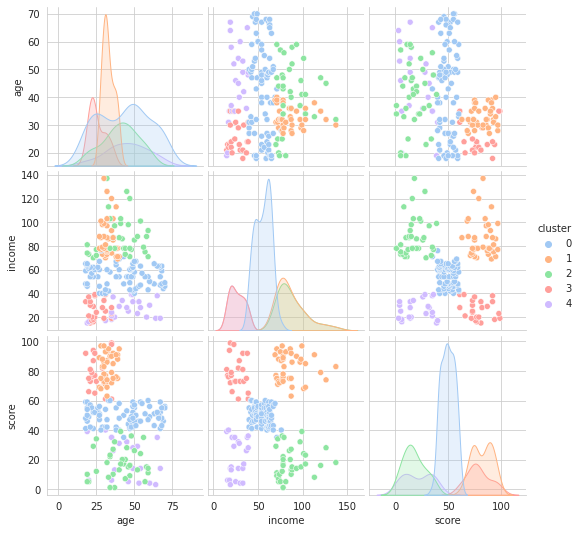

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

In [ ]:
clusters_centers = model.cluster_centers_
clusters_centers = pd.DataFrame(clusters_centers, columns=['age', 'income', 'score'])
clusters_centers.head()

,age,income,score
0,43.088608,55.291139,49.569620
1,32.692308,86.538462,82.128205
2,40.666667,87.750000,17.583333
3,25.521739,26.304348,78.565217
4,45.217391,26.304348,20.913043


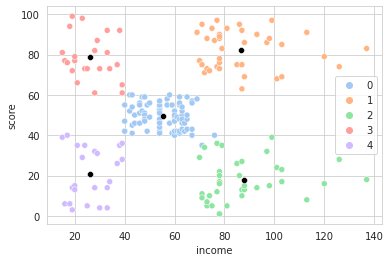

In [ ]:
with sns.axes_style('whitegrid'):

  fig, ax = plt.subplots()
  sns.scatterplot(data=clustered_data,   x='income', y='score', hue='cluster', palette="pastel", ax=ax)
  sns.scatterplot(data=clusters_centers, x='income', y='score', color='black', ax=ax)

## **Avaliação**

**WCSS**

Mede o quão proximo o centróide de um cluster está dos objetos alocados. WCSS baixo quer dizer que os objetos estão próximos do centróide

In [ ]:
wcss = []

for k in range(1,11):

  model = KMeans(n_clusters = k)
  model = model.fit(data)
  wcss.append(model.inertia_)

  

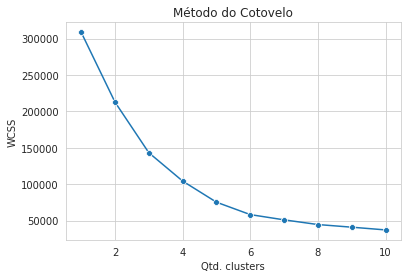

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8", palette="pastel")
  grafico.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Qtd. clusters');

**4 clusters**

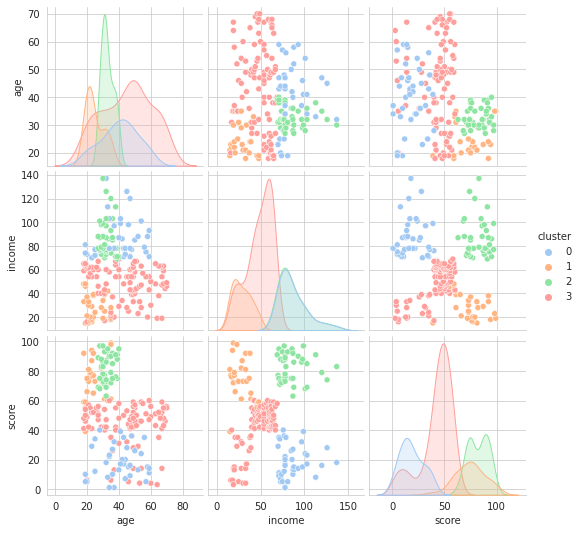

In [ ]:
model = KMeans(n_clusters=4)
model = model.fit(data)

clusters = model.labels_
clustered_data = pd.concat([data, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):
  grafico = sns.pairplot(data = clustered_data, hue='cluster', palette='pastel')

**6 clusters**

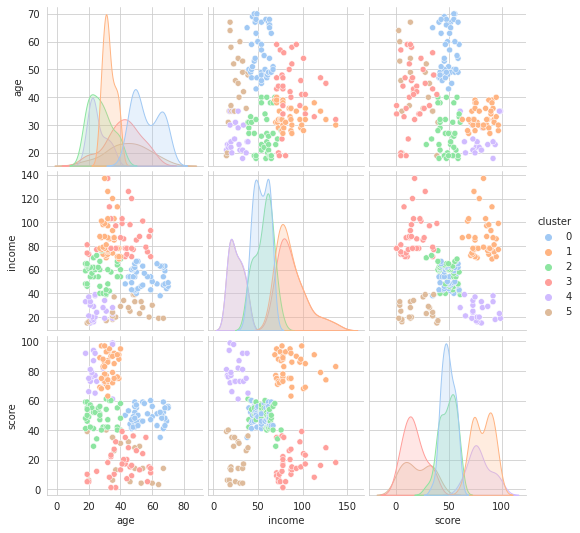

In [ ]:
model = KMeans(n_clusters=6)
model = model.fit(data)

clusters = model.labels_
clustered_data = pd.concat([data, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

**5 clusters**

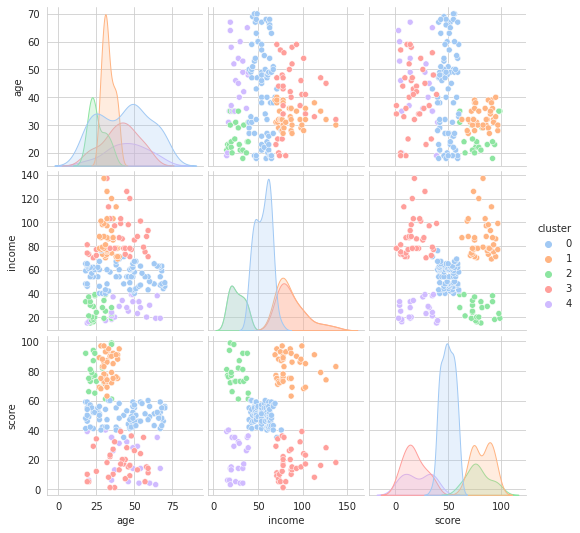

In [ ]:
model = KMeans(n_clusters=5)
model = model.fit(data)

clusters = model.labels_
clustered_data = pd.concat([data, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

## **Predição**

**Estudo dos Clusters**

**CLUSTER 1**

Clientes de alta renda e baixo potencial de compras. Poderiam estar gastando mais no shopping

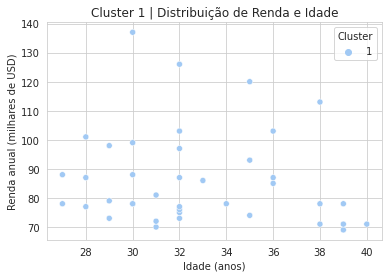

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 1'), x="age", y="income", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 1 | Distribuição de Renda e Idade', xlabel='Idade (anos)', ylabel='Renda anual (milhares de USD)');
  grafico.get_legend().set_title("Cluster");

**Conclusão**: Focar esforços de marketing para um publico acima de 35 anos

**CLUSTER 0 e 5**

São cliente com renda e potencial de compras médio. Podem deixar de frequentar o shopping.

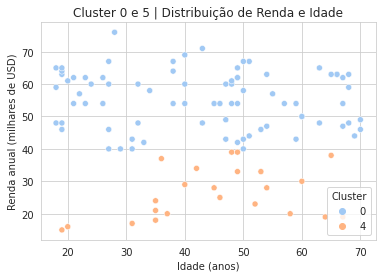

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 0 or cluster == 4'), x="age", y="income", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 0 e 5 | Distribuição de Renda e Idade', xlabel='Idade (anos)', ylabel='Renda anual (milhares de USD)');
  grafico.get_legend().set_title("Cluster");

**Conclusão:** Dividir esforços entre dois públicos: abaixo e acima de 40 anos.

 - **Exemplo**: Um cliente com 19 anos, 15.000 USD de renda anual e potencial de compra de 39:


In [ ]:
cliente = np.array([19, 15, 39])

In [ ]:
cluster = model.predict(cliente.reshape(1, -1))
print(cluster)

[4]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Conclui-se então que o cliente pertence ao cluster **3** de baixa renda, idade e potencial de compra.